# **Project name : Book Recommendation System**

## **Project Type : Unsupervised ML**
---
---



## **Project summary :**

---
---

### During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys. In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create recommendation system for users.

## **Data Description :**

---

---

### The Book-Crossing dataset comprises of 3 files.
### **1. Users :**
### Contains the users. The user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.
### **2. Books :**
### Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book_Title, Book_Author, Year_Of_Publication, Publisher), obtained from Amazon Web Services. In the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image_URL_S, Image_URL_M, Image_URL_L), i.e., small, medium, large. These URLs point to the Amazon website.
### **3. Ratings :**
### Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

## **Data Description of each column in our dataset:**

---

---

1. **User_ID** ⇒ Unique anonymized Id for each user.
2. **Age** ⇒ Age of the user.
3. **Location** ⇒ Location of the user.
4. **ISBN** ⇒ The International Standard Book Number (ISBN) is a 13-digit number that uniquely identifies books and book-like products published internationally.
5. **Book_Title** ⇒ Title of the book.
6. **Book_Author** ⇒ Name of the Author of the book.
7. **Year_Of_Publication** ⇒ Year, the book got published.
8. **Publisher** ⇒ Name of the Publisher
9. **Book_Rating** ⇒ Ratings that the book got.
10. **Image_URL_S** ⇒ Link for the image(small) of the book.
11. **Image_URL_M** ⇒ Link for the image(medium) of the book.
12. **Image_URL_L** ⇒ Link for the image(large) of the book.



In [348]:
# importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import Counter
from scipy.sparse import csr_matrix
from pandas.api.types import is_numeric_dtype
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from IPython.display import Image, display

from skimage import io

import warnings
warnings.filterwarnings("ignore")

In [349]:
# mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [350]:
# reading the books dataset
books_df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECT/Project-4 (Unsupervised ML)/Books.csv',
            names=['ISBN', 'Book_Title', 'Book_Author', 'Year_Of_Publication', 'Publisher', 'Image_URL_S', 'Image_URL_M', 'Image_URL_L'], header=0)

In [351]:
# reading the users dataset
users_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECT/Project-4 (Unsupervised ML)/Users.csv',
                       names= ['User_ID', 'Location', 'Age'], header=0)

In [352]:
# loading the book ratings dataset
ratings_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECT/Project-4 (Unsupervised ML)/Ratings.csv',
                         names= ['User_ID', 'ISBN', 'Book_Rating'], header= 0)

## Function to Display Image from URL :

In [353]:
# Creating a Function to Display the Image from the URL:

def show_image(URL):
  '''
  This function shows the image from the provided URL
  '''

  from IPython.display import Image, display

  display(Image(url=str(URL)))


## **Exploratory Data Analysis on books_df**

In [354]:
# First look of the books dataset
books_df.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [355]:
# number of rows and columns
print('number of rows : ', books_df.shape[0])
print('number of columns : ', books_df.shape[1])

number of rows :  271360
number of columns :  8


In [356]:
# Information of the dataset
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book_Title           271360 non-null  object
 2   Book_Author          271359 non-null  object
 3   Year_Of_Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image_URL_S          271360 non-null  object
 6   Image_URL_M          271360 non-null  object
 7   Image_URL_L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [357]:
# Description of the dataset
books_df.describe(include='all')

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [358]:
#checking for duplicates
books_df.duplicated().sum()

0

In [359]:
# List of the columns
books_df.columns.to_list()

['ISBN',
 'Book_Title',
 'Book_Author',
 'Year_Of_Publication',
 'Publisher',
 'Image_URL_S',
 'Image_URL_M',
 'Image_URL_L']

In [360]:
# checking the null values in our dataset
books_df.isna().sum()

ISBN                   0
Book_Title             0
Book_Author            1
Year_Of_Publication    0
Publisher              2
Image_URL_S            0
Image_URL_M            0
Image_URL_L            3
dtype: int64

## Remarks :

>### There are 8 Columns and 271360 Rows in books_df.
>### Thers is no Duplicated records with 1 Null value in Book_Author, 2 Null values in Publisher and 3 Null values in Image_Url_L Column.

## Treating NaN value of Book_Author Column :

In [361]:
# finding the row with null value in 'Book_Author' column
books_df[books_df['Book_Author'].isna()]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [362]:
# Checking wheather there is any book of same name, so that the book author name can be selected from there.
books_df[books_df.Book_Title== books_df[books_df['Book_Author'].isna()].reset_index()['Book_Title'][0]]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [363]:
# Checking the cover page of the book.
show_image('http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg')

### As there is only one book titled **The Credit Suisse Guide to Managing Your Personal Wealth** which has no auther and we can't get the referrence image, So we are going to remove that record.

In [364]:
# Dropping Row containing NaN value.
books_df.dropna(subset= 'Book_Author', inplace=True)

In [365]:
# Rechecking
books_df[books_df['Book_Author'].isna()]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L


## Treating NaN value of Publisher Column :

In [366]:
# finding the rows with null value in 'Publisher' column
books_df[books_df['Publisher'].isna()]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


### As there are only 2 records which have no publishers, so we are collecting the name of the publisher from Amazon and then replacing them.

In [367]:
# Replacing the publisher of book- Tyrant Moon
# From URL link : https://www.amazon.in/Tyrant-Moon-Elaine-Corvidae/dp/193169656X
books_df['Publisher'][128890]='Novelbooks Inc'


In [368]:
# Replacing the publisher of book- Finders Keepers
# From url link : https://books.google.com/books/about/Finders_Keepers.html?id=M9pbPgAACAAJ
books_df['Publisher'][129037]='NovelBooks, Incorporated'

## Treating NaN value of Image_URL_L Column :

In [369]:
books_df[books_df.Image_URL_L.isna()].reset_index()


,index,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
1,220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
2,221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


### From above observation we can see that, the Records of columns have been shifted to the previous column.

### So we are going to rectify that error.

In [370]:
# Shifting the Records of Columns to their respective places.
books_df.loc[[209538,220731,221678],'Image_URL_L']= books_df.loc[[209538,220731,221678], 'Image_URL_M']
books_df.loc[[209538,220731,221678], 'Image_URL_M']= books_df.loc[[209538,220731,221678], 'Image_URL_S']
books_df.loc[[209538,220731,221678], 'Image_URL_S']= books_df.loc[[209538,220731,221678], 'Publisher']
books_df.loc[[209538,220731,221678], 'Publisher']= books_df.loc[[209538,220731,221678], 'Year_Of_Publication']
books_df.loc[[209538,220731,221678], 'Year_Of_Publication']= books_df.loc[[209538,220731,221678], 'Book_Author']

In [371]:
# Assigning the correct Book_Title to the respective Records taking referrence from the Amazon website.
books_df.loc[[209538,220731,221678], 'Book_Title']= ['Creating the X-Men, How It All Began', 'Peuple du ciel', 'Creating the X-Men, How Comic Books Come to Life']

In [372]:
# Assigning the correct Book_Author to the respective Records taking referrence from the Amazon website.
books_df.loc[[209538,220731,221678], 'Book_Author']= ["Michael Teitelbaum", "J M G Le Clezio", "Cynthia O'Neill"]

In [373]:
# Rechecking the null values of each column.
books_df.isna().sum()

ISBN                   0
Book_Title             0
Book_Author            0
Year_Of_Publication    0
Publisher              0
Image_URL_S            0
Image_URL_M            0
Image_URL_L            0
dtype: int64

## We successfully Treated the Null Values.

In [374]:
# Checking data type of Year_Of_Publication column.
books_df.Year_Of_Publication.dtype

dtype('O')

In [375]:
# Converting the data type of Year_Of_Publication column into integer.
books_df['Year_Of_Publication']= books_df['Year_Of_Publication'].astype(int)

In [376]:
# Checking unique values.
books_df['Year_Of_Publication'].nunique(), np.sort((books_df['Year_Of_Publication'].unique()))

(116,
 array([   0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908,
        1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924,
        1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935,
        1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
        1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
        1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
        1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
        1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
        1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
        2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021,
        2024, 2026, 2030, 2037, 2038, 2050]))

>### From above data we can see that there are year that is beyond the present time. So we are going to treat them properly.

>### Whereever the year is greater than 2023, we will treat them.

In [377]:
# Changing the Year_Of_Publication observations that have errors.
books_df['Year_Of_Publication']= np.where(books_df['Year_Of_Publication'] > 2023, books_df['Year_Of_Publication']-100,
                                          books_df['Year_Of_Publication'])

In [378]:
books_df[books_df['Year_Of_Publication']==0].shape

(4618, 8)

>### There are 4618 observations where the Year_Of_Publication column contains **Zero** which don't make sense.

>### So we are going to replace those observations with the median value.

In [379]:
# Replacing the Records of  Year_Of_Publication column containing zero values with median value.
books_df['Year_Of_Publication']= np.where(books_df['Year_Of_Publication']==0,
                                          round(books_df['Year_Of_Publication'].median()), books_df['Year_Of_Publication'])

In [380]:
# Rechecking the Zero values present in the Year_Of_Publication column.
books_df[books_df['Year_Of_Publication']==0].Year_Of_Publication.count()

0

Text(0.5, 1.0, 'Distribution of years')

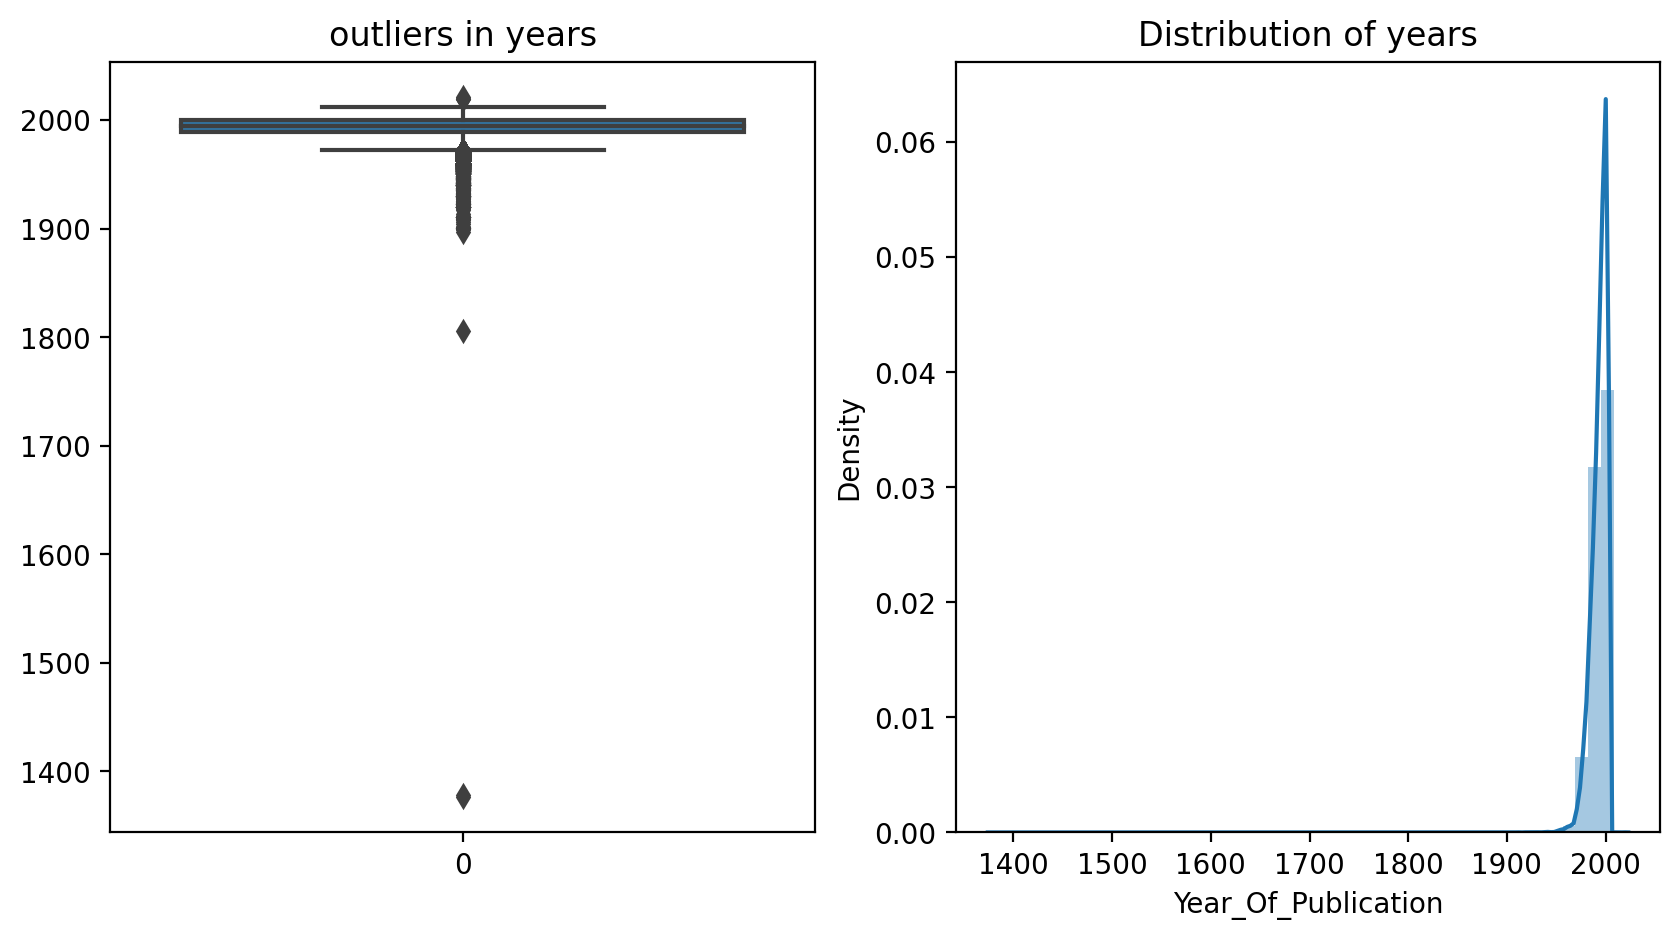

In [381]:
# checking the ouliers and distribution of year-of-publication column
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.boxplot(books_df['Year_Of_Publication'])
plt.title('outliers in years')
plt.subplot(1,2,2)
sns.distplot(books_df['Year_Of_Publication'])
plt.title('Distribution of years')

In [382]:
books_df[books_df['Year_Of_Publication']< 1900]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
171817,0781228956,"Complete Works 10 Volumes [2,6,7,8,9] (Notable...",Benjamin Franklin,1806,Reprint Services Corp,http://images.amazon.com/images/P/0781228956.0...,http://images.amazon.com/images/P/0781228956.0...,http://images.amazon.com/images/P/0781228956.0...
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...
245607,0781268001,"Hugh Wynne, Free Quaker (2 Volumes (BCL1-PS Am...",Silas Weir Mitchell,1897,Reprint Services Corp,http://images.amazon.com/images/P/0781268001.0...,http://images.amazon.com/images/P/0781268001.0...,http://images.amazon.com/images/P/0781268001.0...
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...


### In the above observation the book written by **Nazi Safavi** with ISBN number of 9643112136 is actually published in 2010.
### So we are going to rectify it.

In [383]:
# Changing the year.
books_df.loc[books_df['ISBN']== '9643112136', 'Year_Of_Publication']=2010

In [384]:
# Rechecking.
books_df[books_df['ISBN']== '9643112136']

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,2010,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...


### As the other book which was published in the 13th century has no referrence. so we are going to remove that record.

In [385]:
# Removing that Record.
books_df.drop(253750, axis=0, inplace=True)

In [386]:
# Rechecking.
books_df[books_df.ISBN=='964442011X']

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L


## Checking Top Authors:

---



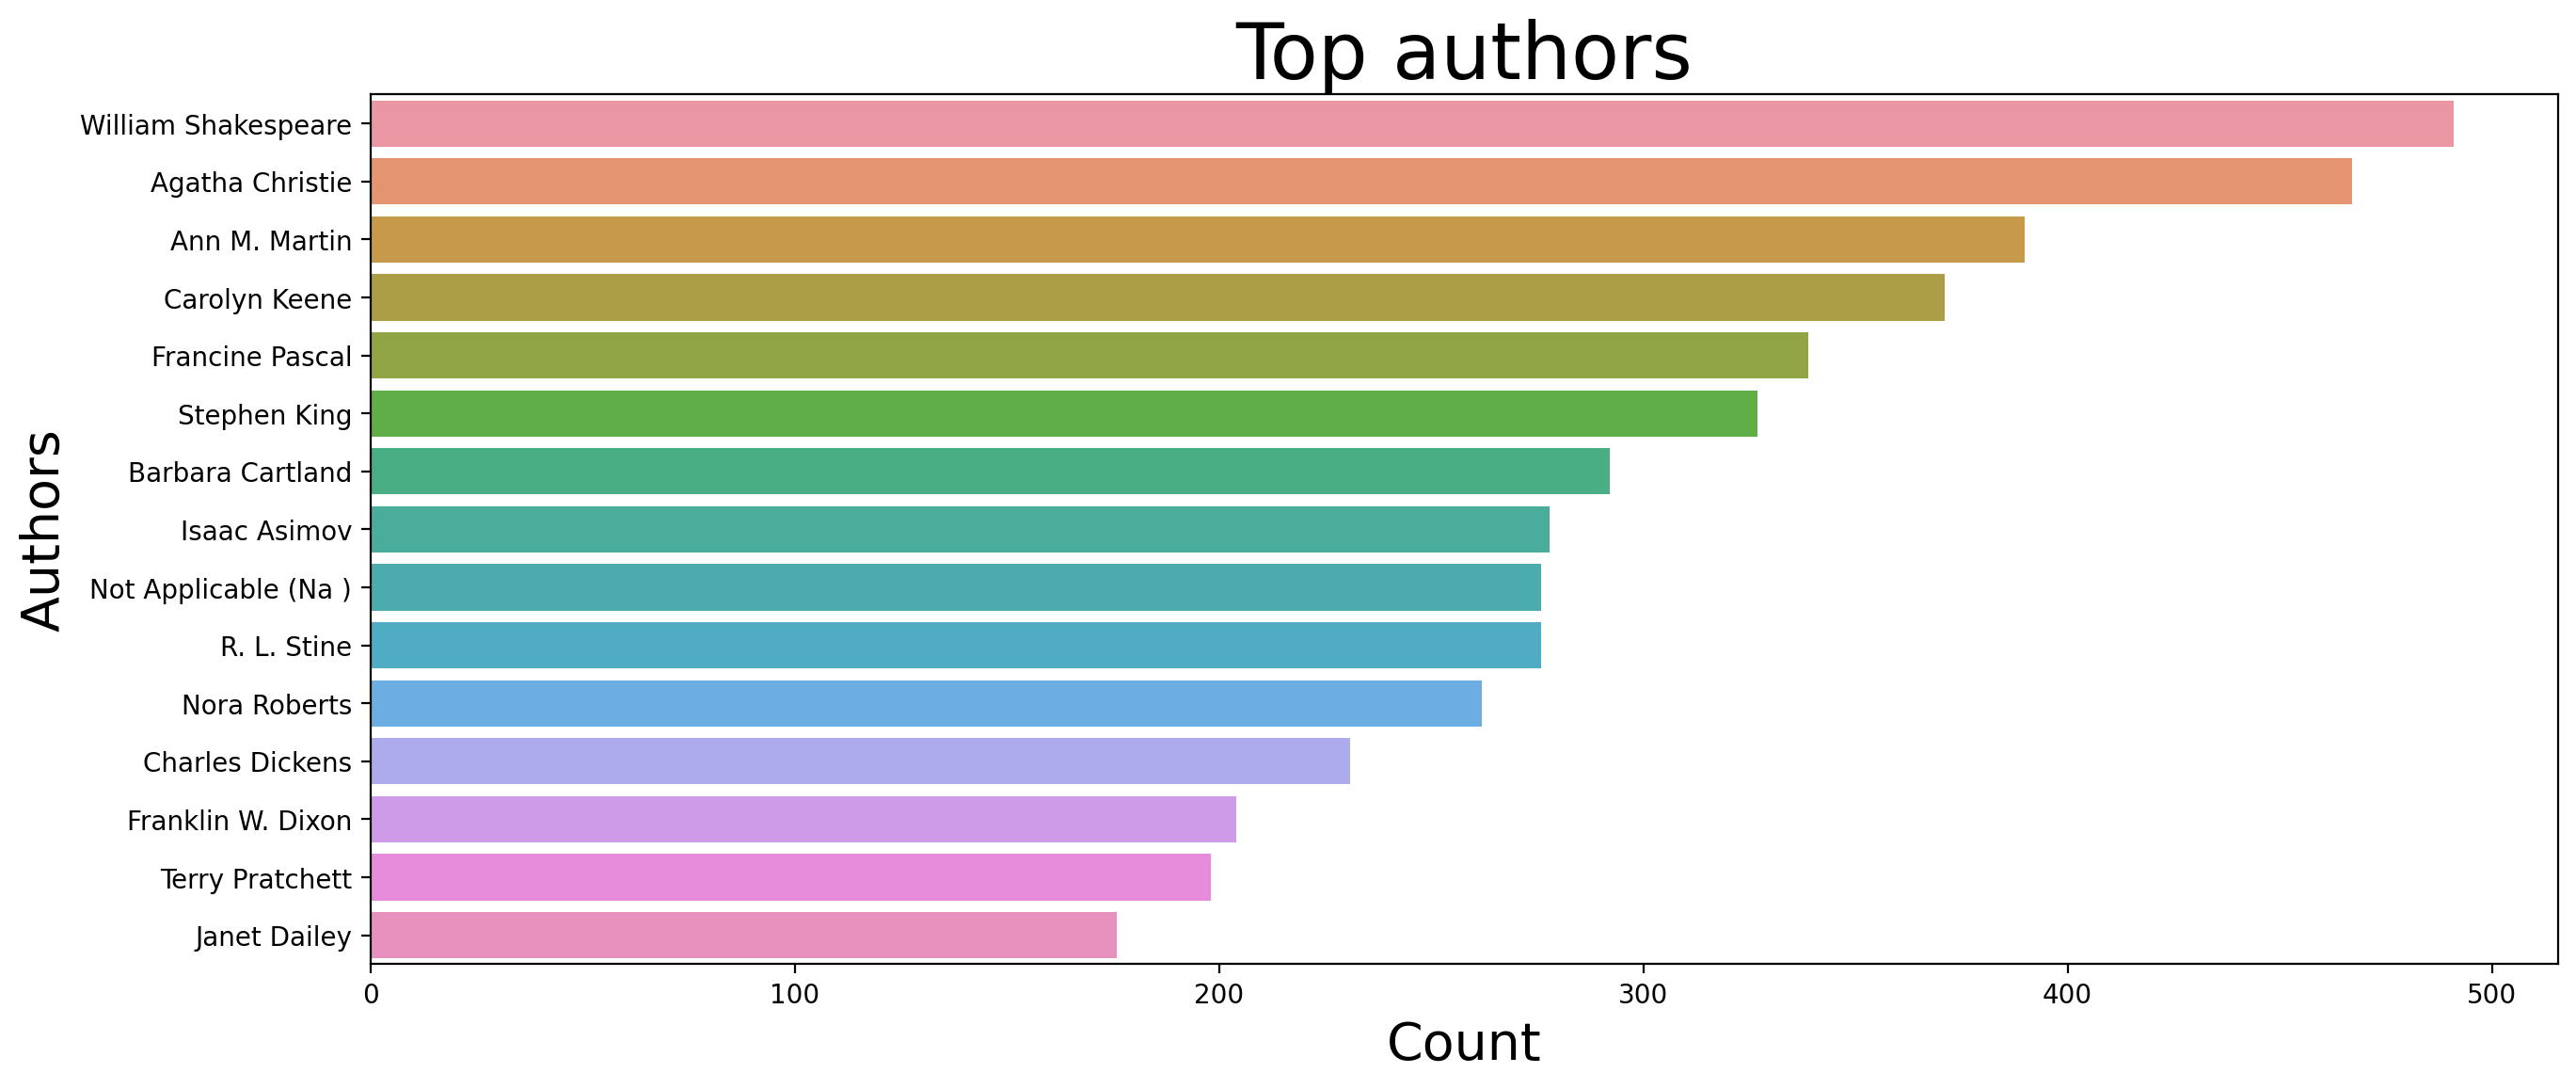

In [387]:
# Getting top-15 Authors.
plt.figure(figsize=(15,6))

# Taking the unique Books Names for best evaluation
fig= sns.barplot(y= books_df.drop_duplicates(subset=['Book_Title']).Book_Author.value_counts().iloc[:15].reset_index()['index'],
            x= books_df.drop_duplicates(subset=['Book_Title']).Book_Author.value_counts().iloc[:15].reset_index()['Book_Author'])
fig.set_title('Top authors', fontsize= 30)
fig.set_xlabel('Count', fontsize= 20)
fig.set_ylabel('Authors', fontsize= 20)
plt.show()

## Top Five Authors are:

>### 1. William Shakespeare
>### 2. Agatha Christie
>### 3. Ann M. Martin
>### 4. Carolyn Keene
>### 5. Francine Pascal

## Checking Top Publisher:

---



Text(0.5, 1.0, 'Top Publishers')

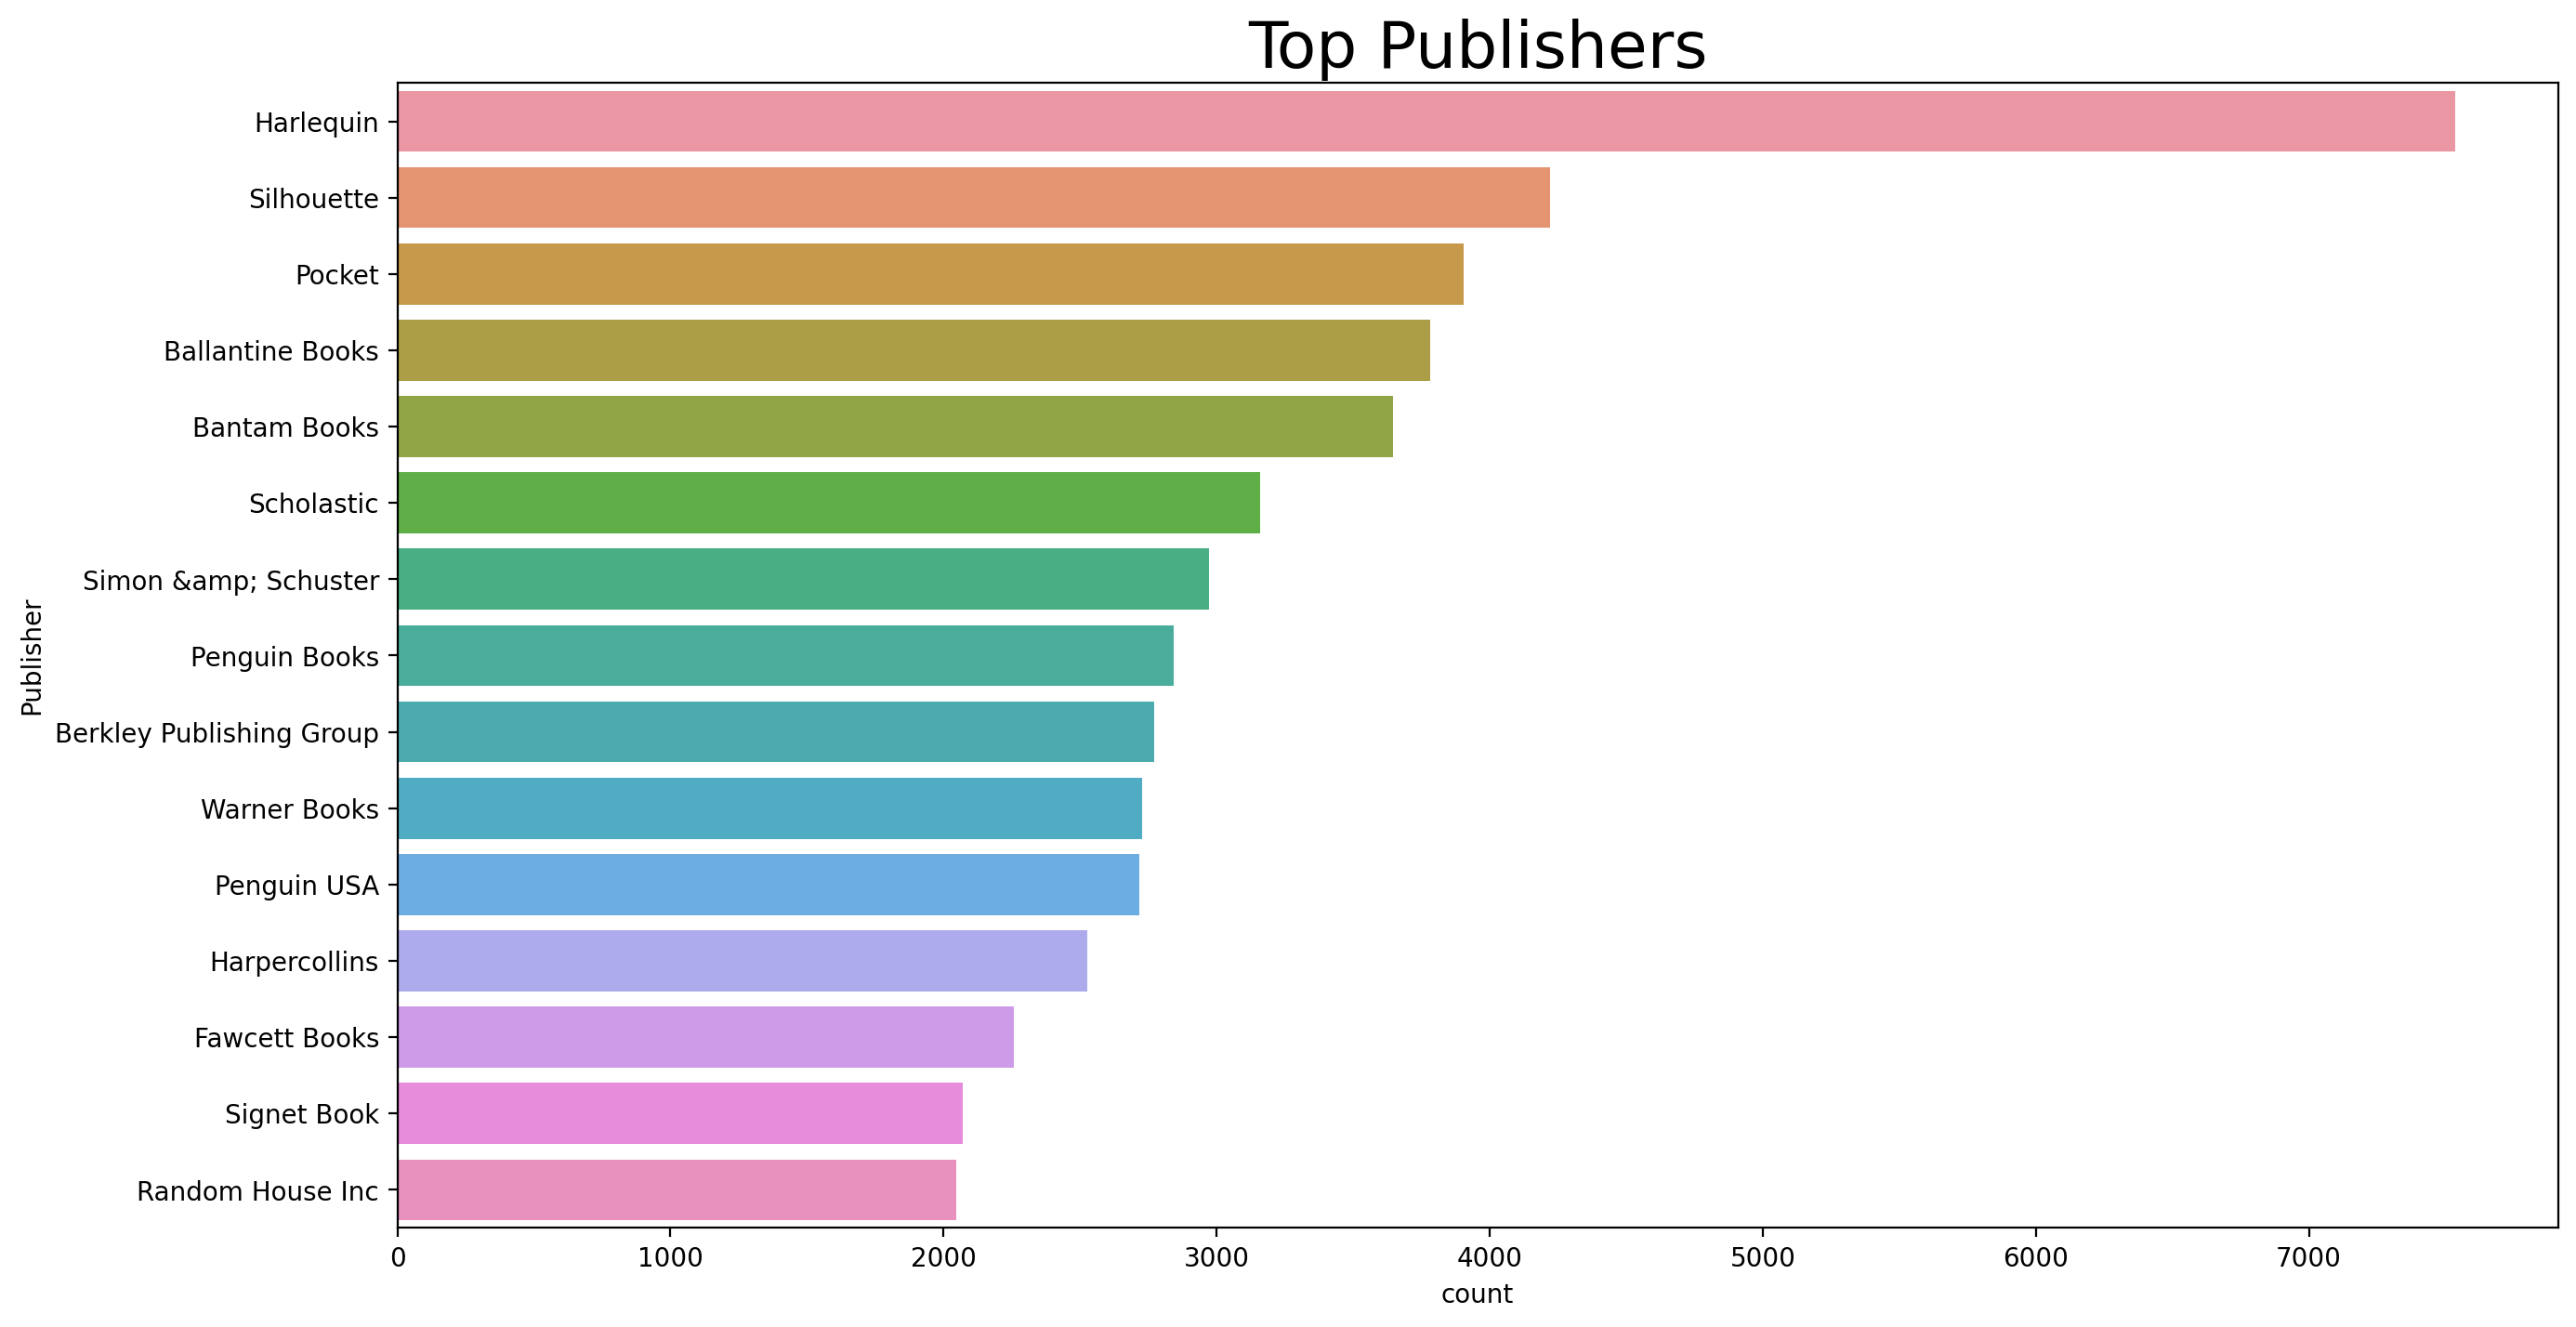

In [388]:
# Checking Top-15 Publishers.
plt.figure(figsize=(15,8))
sns.countplot(y='Publisher',data=books_df,order=pd.value_counts(books_df['Publisher']).iloc[:15].index)
plt.title('Top Publishers',fontsize=25)

## Top Five Publisher are:

>### 1. Harlequin
>### 2. Silhouette
>### 3. Pocket
>### 4. Ballantine Books
>### 5. Bantam Books

## Checking Top Publishing Years:

---



Text(0.5, 1.0, 'Top Publishing Years')

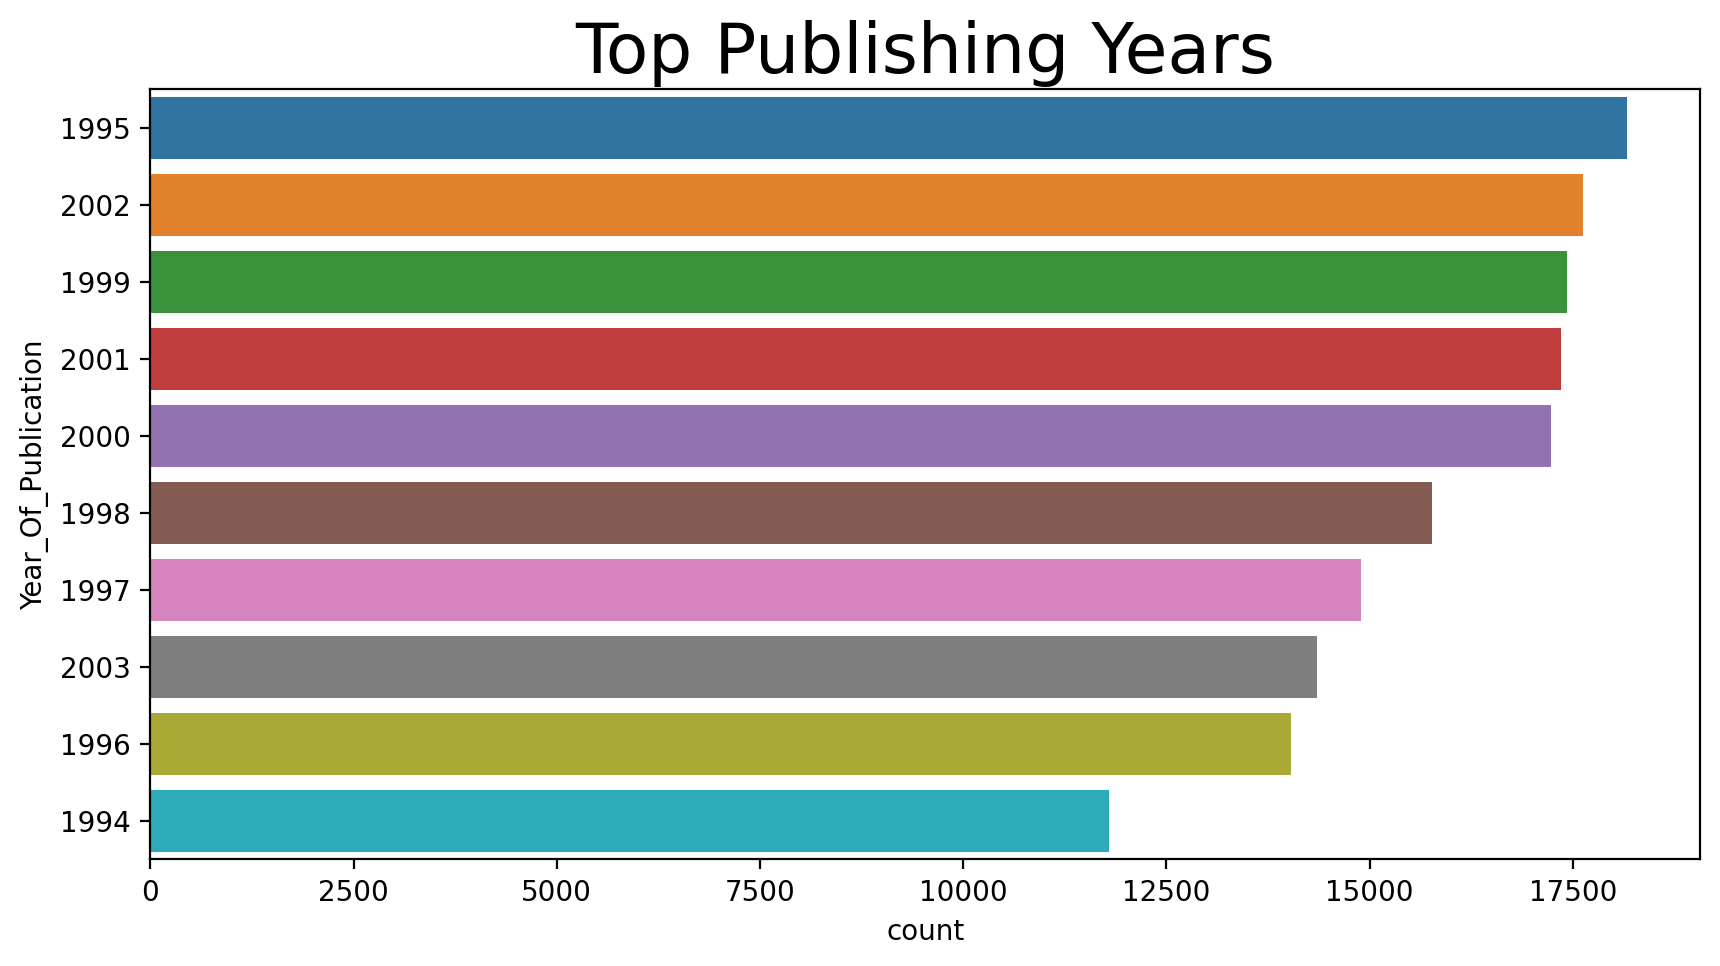

In [389]:
# Checking Top-10 Publishing Years.
plt.figure(figsize=(10,5))
sns.countplot(y='Year_Of_Publication',data=books_df,order=pd.value_counts(books_df['Year_Of_Publication']).iloc[:10].index)
plt.title('Top Publishing Years',fontsize=25)

### From the above plot we can see that, highest number of books are published in the year of 1995 followed by 2002, 1999, 2001, 2000.

## Checking Most Purchased Books:

---



Text(0.5, 1.0, 'Most Purchased Books')

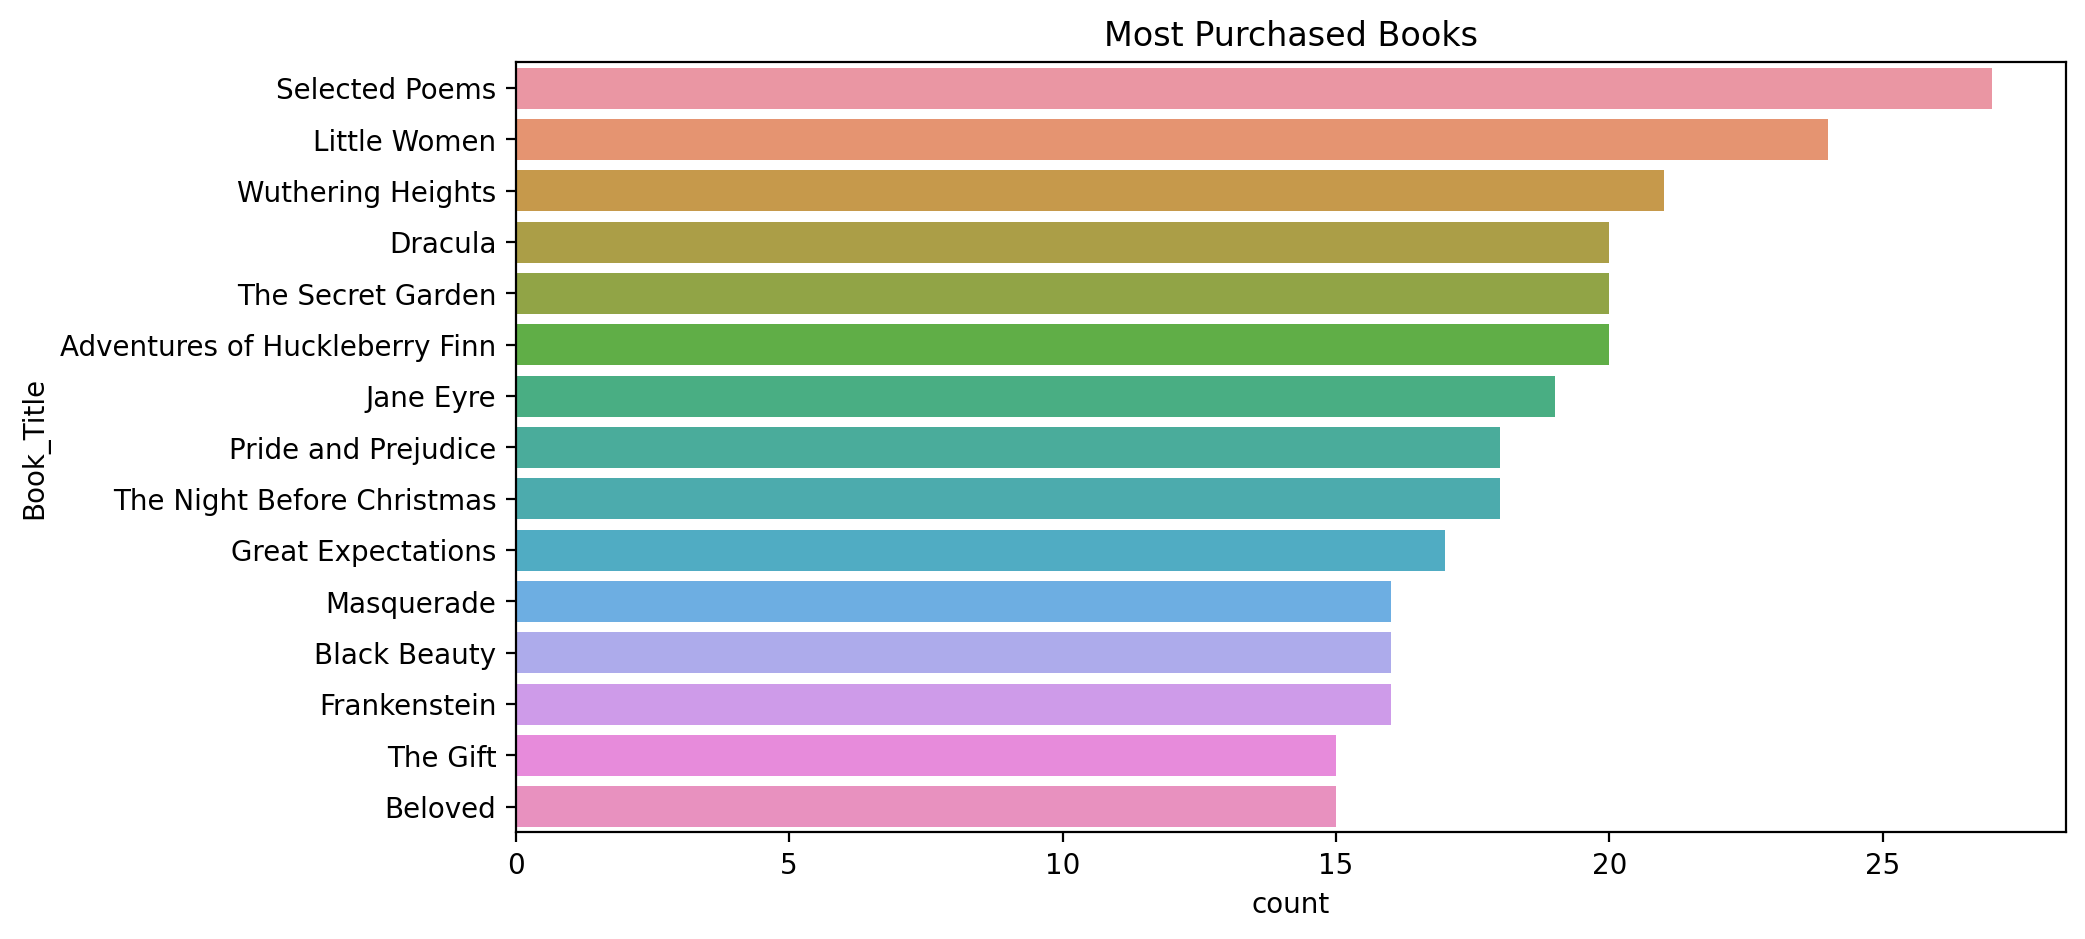

In [390]:
# Checking Top-15 Purchased Books.
plt.figure(figsize= (10,5))
sns.countplot(y= 'Book_Title', data= books_df, order= pd.value_counts(books_df['Book_Title']).iloc[:15].index)
plt.title('Most Purchased Books')

## Top Five Purchased Books are:

>### 1. Selected Poems
>### 2. Little Women
>### 3. Wuthering Heights
>### 4. Dracula
>### 5. The Secret Garden

In [391]:
books_df.Book_Title.value_counts()[:15]

Selected Poems                    27
Little Women                      24
Wuthering Heights                 21
Dracula                           20
The Secret Garden                 20
Adventures of Huckleberry Finn    20
Jane Eyre                         19
Pride and Prejudice               18
The Night Before Christmas        18
Great Expectations                17
Masquerade                        16
Black Beauty                      16
Frankenstein                      16
The Gift                          15
Beloved                           15
Name: Book_Title, dtype: int64

## **Exploratory Data Analysis on users_df**

In [392]:
# first look of users dataset
users_df.head()

,User_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [393]:
# shape of users dataset
print('number of rows :', users_df.shape[0])
print('number of columns :', users_df.shape[1])

number of rows : 278858
number of columns : 3


In [394]:
# Checking the name of columns.
users_df.columns

Index(['User_ID', 'Location', 'Age'], dtype='object')

In [395]:
# Checking the information about users_df.
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User_ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [396]:
# Checking the descriptions of the users_df.
users_df.describe(include = 'all')

,User_ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


In [397]:
# Checking the duplicates.
users_df.duplicated().sum()

0

In [398]:
# Checking the Null values.
users_df.isnull().sum()

User_ID          0
Location         0
Age         110762
dtype: int64

## Remarks :

>### There are 3 Columns and 278858 Rows in users_df.
>### Thers is no Duplicated records with 110762 Null values in Age Column.

In [399]:
# Checking the Age column.
print(sorted(users_df.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Text(0.5, 1.0, 'Outliers in Age column')

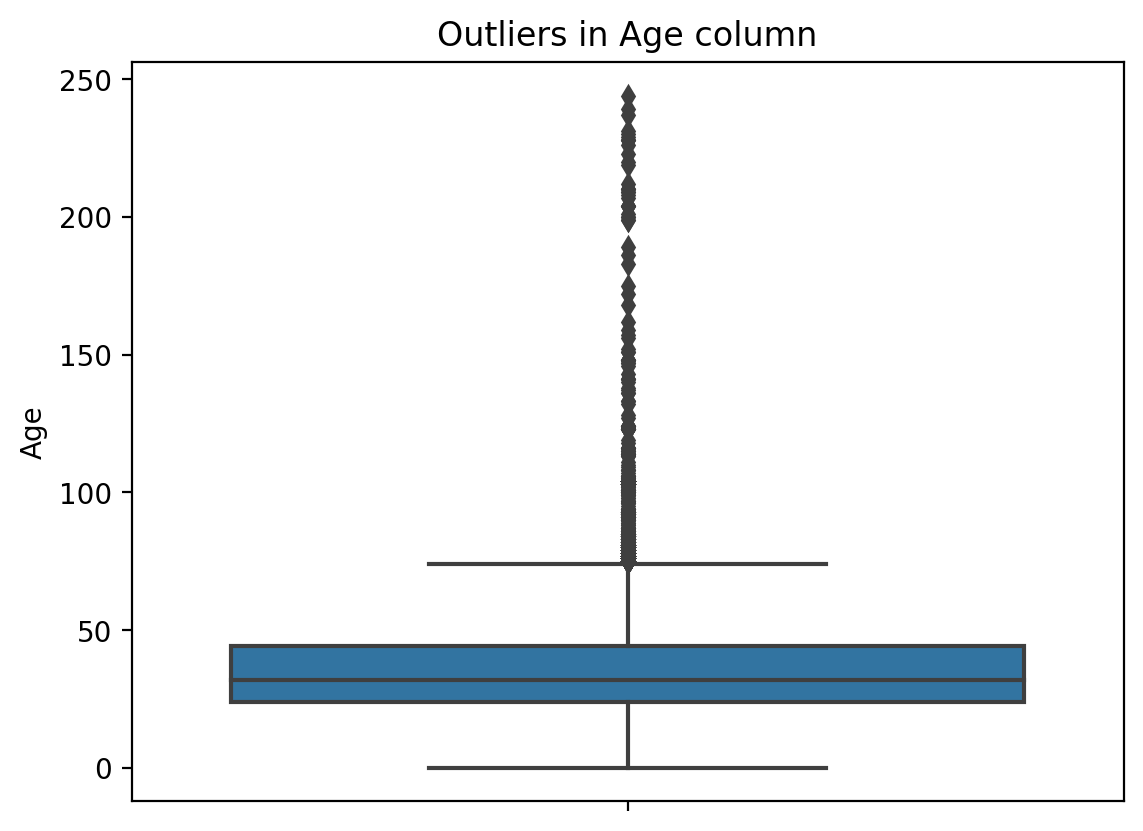

In [400]:
# lets check the Data Distribution of Age column by Boxplot.
sns.boxplot(y='Age',data = users_df)
plt.title('Outliers in Age column')

In [401]:
users_df[users_df['Age']>100]['Age'].value_counts().sum()

366

### As in the Age column there are age beyond 100, so are replacing the age beyond 200 by (age-200) and the age beyond 100 by (age-100).

In [402]:
# Rectifying the age valuesl.
users_df['Age']= np.where((users_df['Age'] >200), users_df['Age']-200, users_df['Age'])
users_df['Age']= np.where((users_df['Age'] >100), users_df['Age']-100, users_df['Age'])

In [403]:
# Checking the age beyond 100.
users_df[users_df['Age']>100]['Age'].value_counts().sum()

0

Text(0.5, 1.0, 'Age distribution')

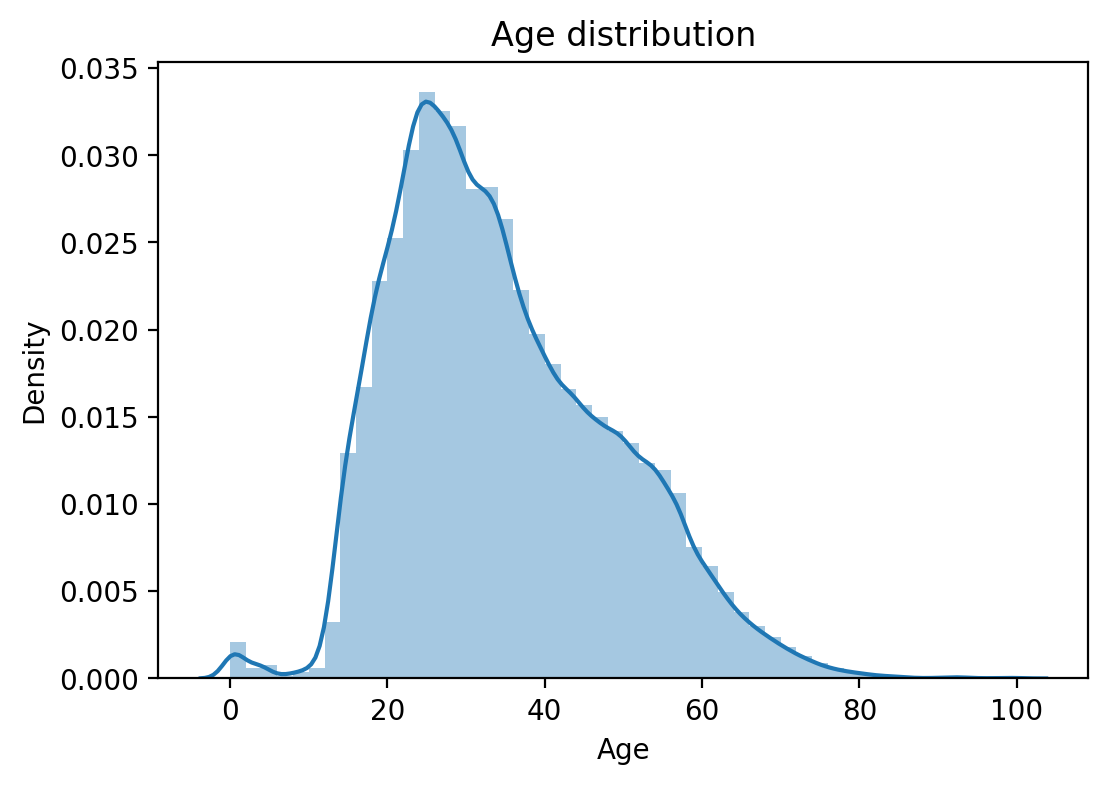

In [404]:
# checking the distribution of age column
plt.figure(figsize = (6,4))
sns.distplot(users_df['Age'])
plt.title('Age distribution')

In [405]:
# As the Children below 5 years old can't read properly we are going to replace them with the median value of age( as the age column distribution is skewed)
users_df['Age']= np.where((users_df.Age < 5), users_df['Age'].median(),users_df.Age)

In [406]:
# Replacing the Null values of Age column with the median value as well.
users_df['Age'].fillna(users_df['Age'].median(), inplace= True)

Text(0.5, 1.0, 'Outliers in Age column')

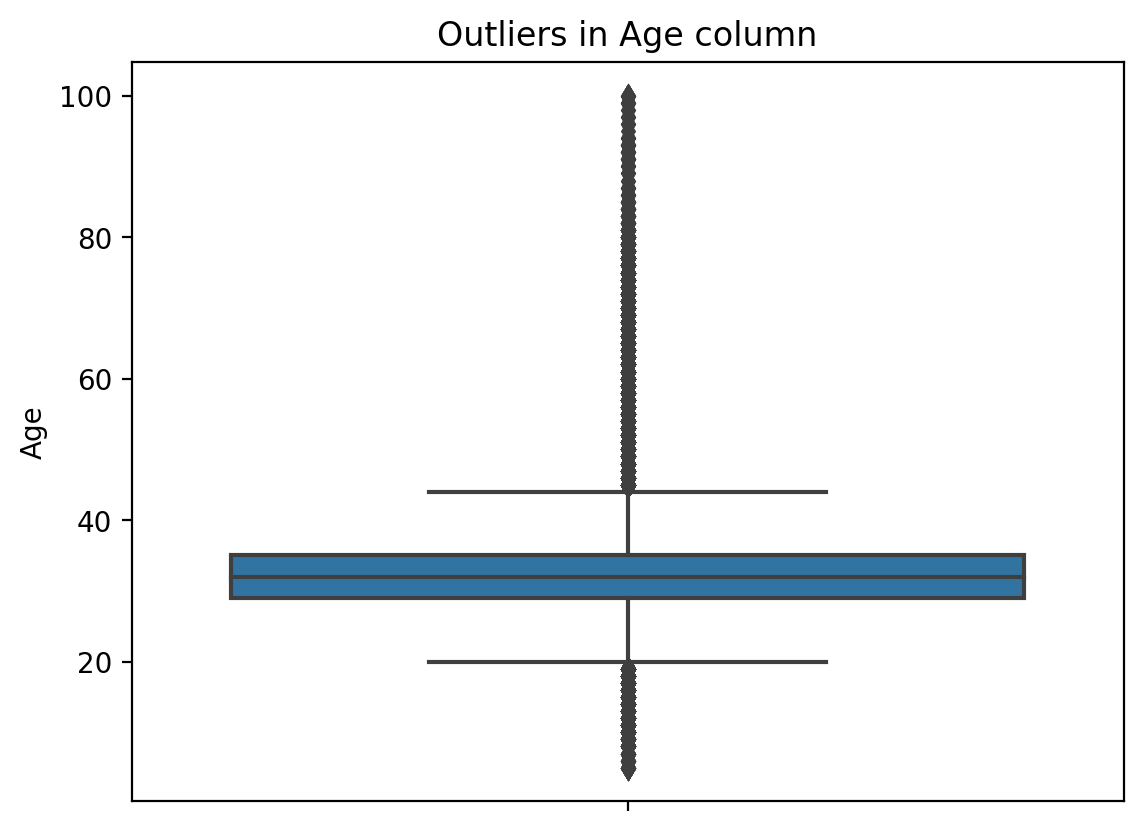

In [407]:
# Checking the data distribution using the boxplot.
sns.boxplot(y='Age',data = users_df)
plt.title('Outliers in Age column')

In [408]:
# checking the unique location names
users_df['Location'].unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [409]:
# number of unique locations
users_df['Location'].nunique()

57339

## Top 15 Locations with most users.

Text(0.5, 0, 'Count')

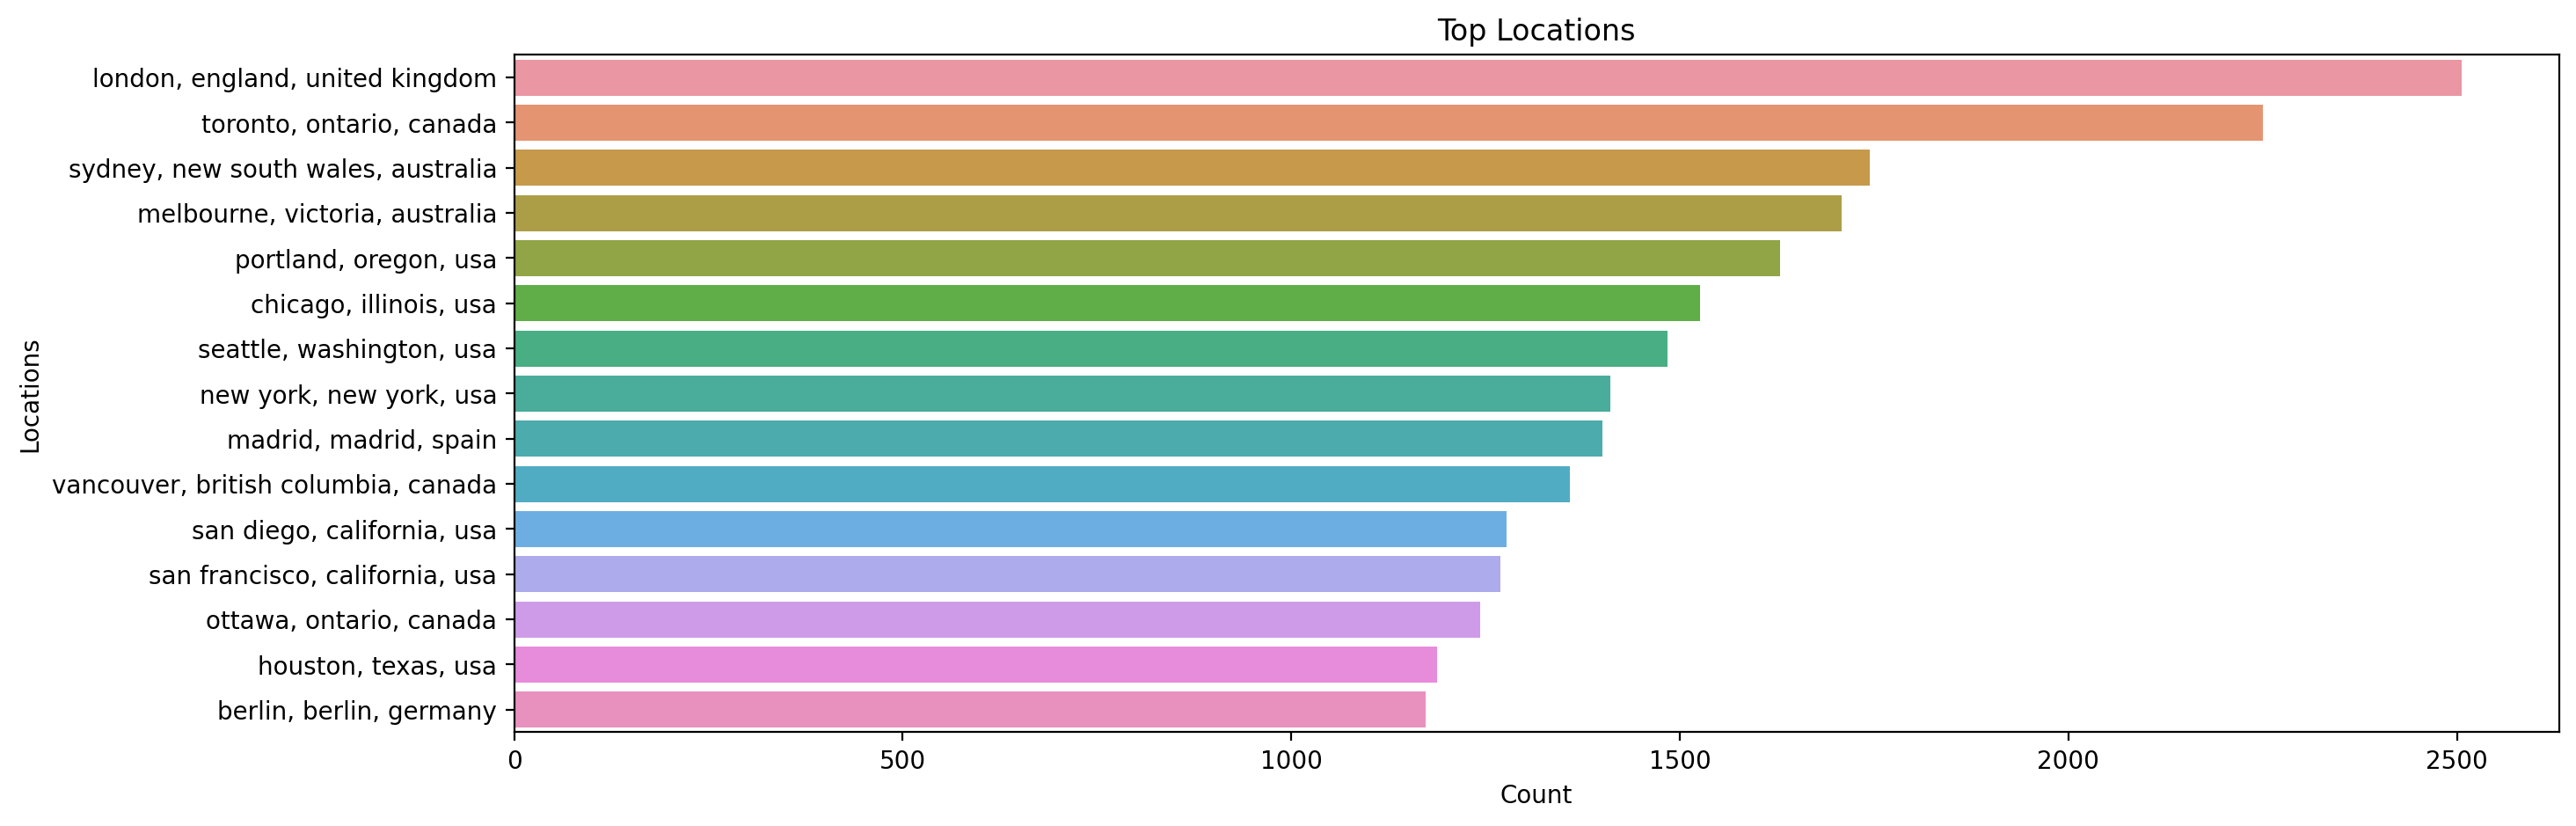

In [410]:
# Getting the top-15 locations with most user.
plt.figure(figsize= (15,5))

sns.barplot(y= users_df['Location'].value_counts().iloc[:15].reset_index()['index'],
            x= users_df['Location'].value_counts().iloc[:15].reset_index().Location)
plt.title('Top Locations')
plt.ylabel('Locations')
plt.xlabel('Count')

### From above plot we can conclude that, **"london, england, united kingdom" and "toronto, ontario, canada"** have significant amount of Users.

### Extracting the City, State and Country from Location:

In [411]:
# Separating City, State and Country from Location
loc_list= users_df.Location.str.split(', ')

City_list= []
State_list= []
Country_list= []

for i in range(0,len(loc_list)):
  # Removing invalid entries.
  if loc_list[i][0] == ' ' or loc_list[i][0] == '' or loc_list[i][0]== 'n/a' or loc_list[i][0] == ',':
    City_list.append('annonymous')
  else:
    City_list.append(loc_list[i][0].lower())
  if (len(loc_list[i]) < 2):
    State_list.append('annonymous')
    Country_list.append('annonymous')
  else:
    # Removing invalid entries.
    if loc_list[i][1]== ' ' or loc_list[i][1]== '' or loc_list[i][1]=='n/a' or loc_list[i][1]== ',':
      State_list.append('annonymous')
    else:
      State_list.append(loc_list[i][1].lower())
    # Removing invalid entries.
    if (len(loc_list[i]) < 3):
      Country_list.append('annonymous')
    else:
      # Removing invalid entries.
      if loc_list[i][2]== '' or loc_list[i][1]== ',' or loc_list[i][2]== ' ' or loc_list[i][2]== 'n/a':
        Country_list.append('annonymous')
      else:
        Country_list.append(loc_list[i][2].lower())

# Handling cases where city is written as city/state.
correct_city_list= []
for arg in City_list:
  city_name= arg.split('/')
  correct_city_list.append(city_name[0])

# Creating separate Datafrmaes of City, State and Country.
df_city= pd.DataFrame(correct_city_list, columns=['City'])
df_state= pd.DataFrame(State_list, columns=['State'])
df_country= pd.DataFrame(Country_list, columns=['Country'])

# Joining City, State and Country Dataframe with users_df
users_df= pd.concat([users_df, df_city], axis=1)
users_df= pd.concat([users_df, df_state], axis=1)
users_df= pd.concat([users_df, df_country], axis=1)

# Removing Location column as we extracted City, State and Country.
users_df.drop('Location',axis=1, inplace= True)

In [414]:
# Rechecking the users_df again
users_df.sample(5, random_state=1)

,User_ID,Age,City,State,Country
128583,128584,46.0,glasgow,scotland,united kingdom
14728,14729,32.0,durban,kwazulu natal,south africa
73410,73411,35.0,lincoln,england,united kingdom
43743,43744,32.0,seoul,seoul,south korea
130478,130479,61.0,fort smith,arkansas,usa


### Top 15 Cities with most users:

Text(0.5, 0, 'Count')

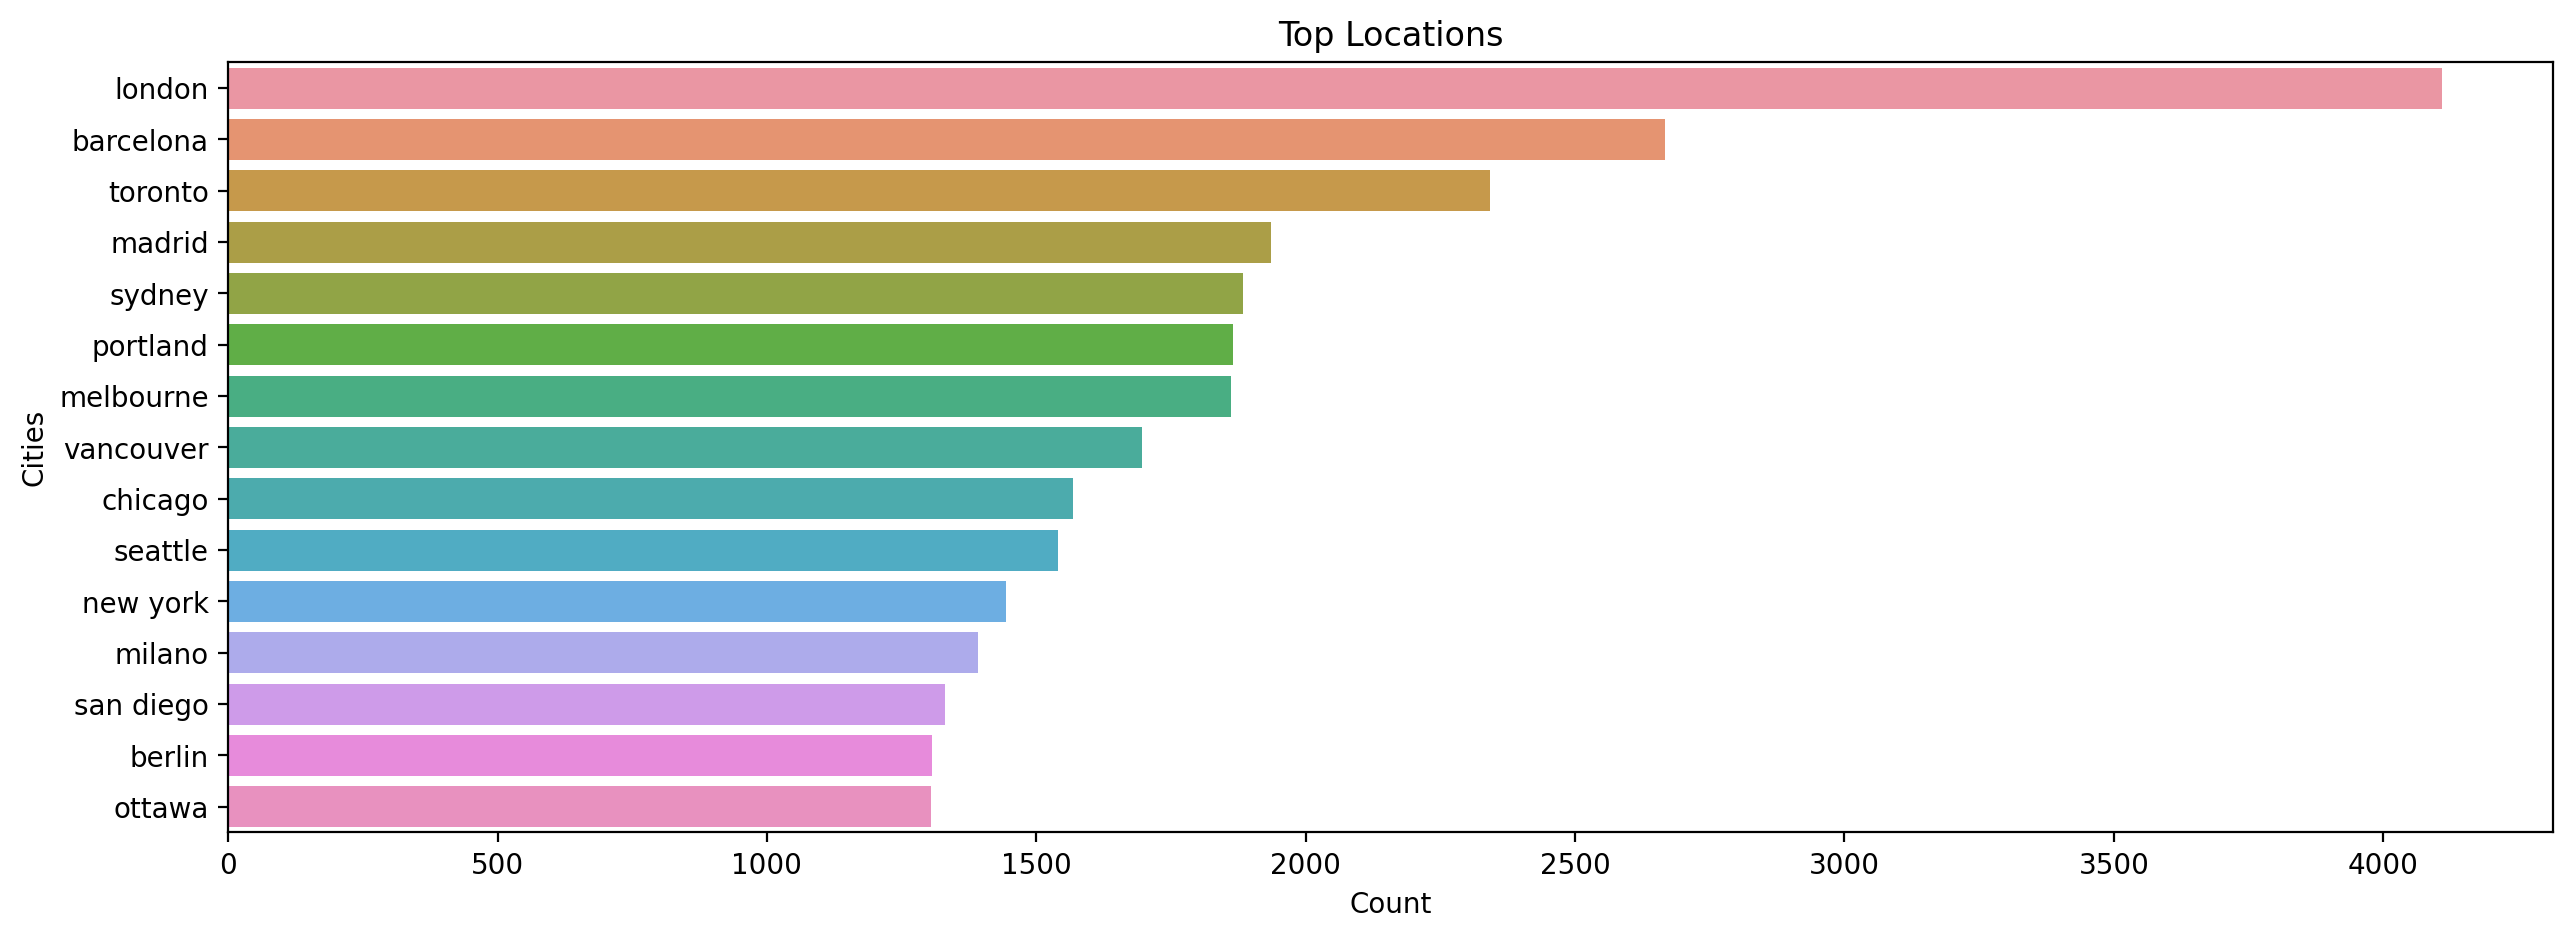

In [418]:
# Getting the top-15 countries with most user.
plt.figure(figsize= (15,5))

sns.barplot(y= users_df['City'].value_counts().iloc[:15].reset_index()['index'],
            x= users_df['City'].value_counts().iloc[:15].reset_index().City)
plt.title('Top Locations')
plt.ylabel('Cities')
plt.xlabel('Count')

### As we can see that, most of the users belongs to the City **London(Maximum)** followed by **Barcelon, Toronto, Madrid, Sydney**.

### Top 15 States with most users:

Text(0.5, 0, 'Count')

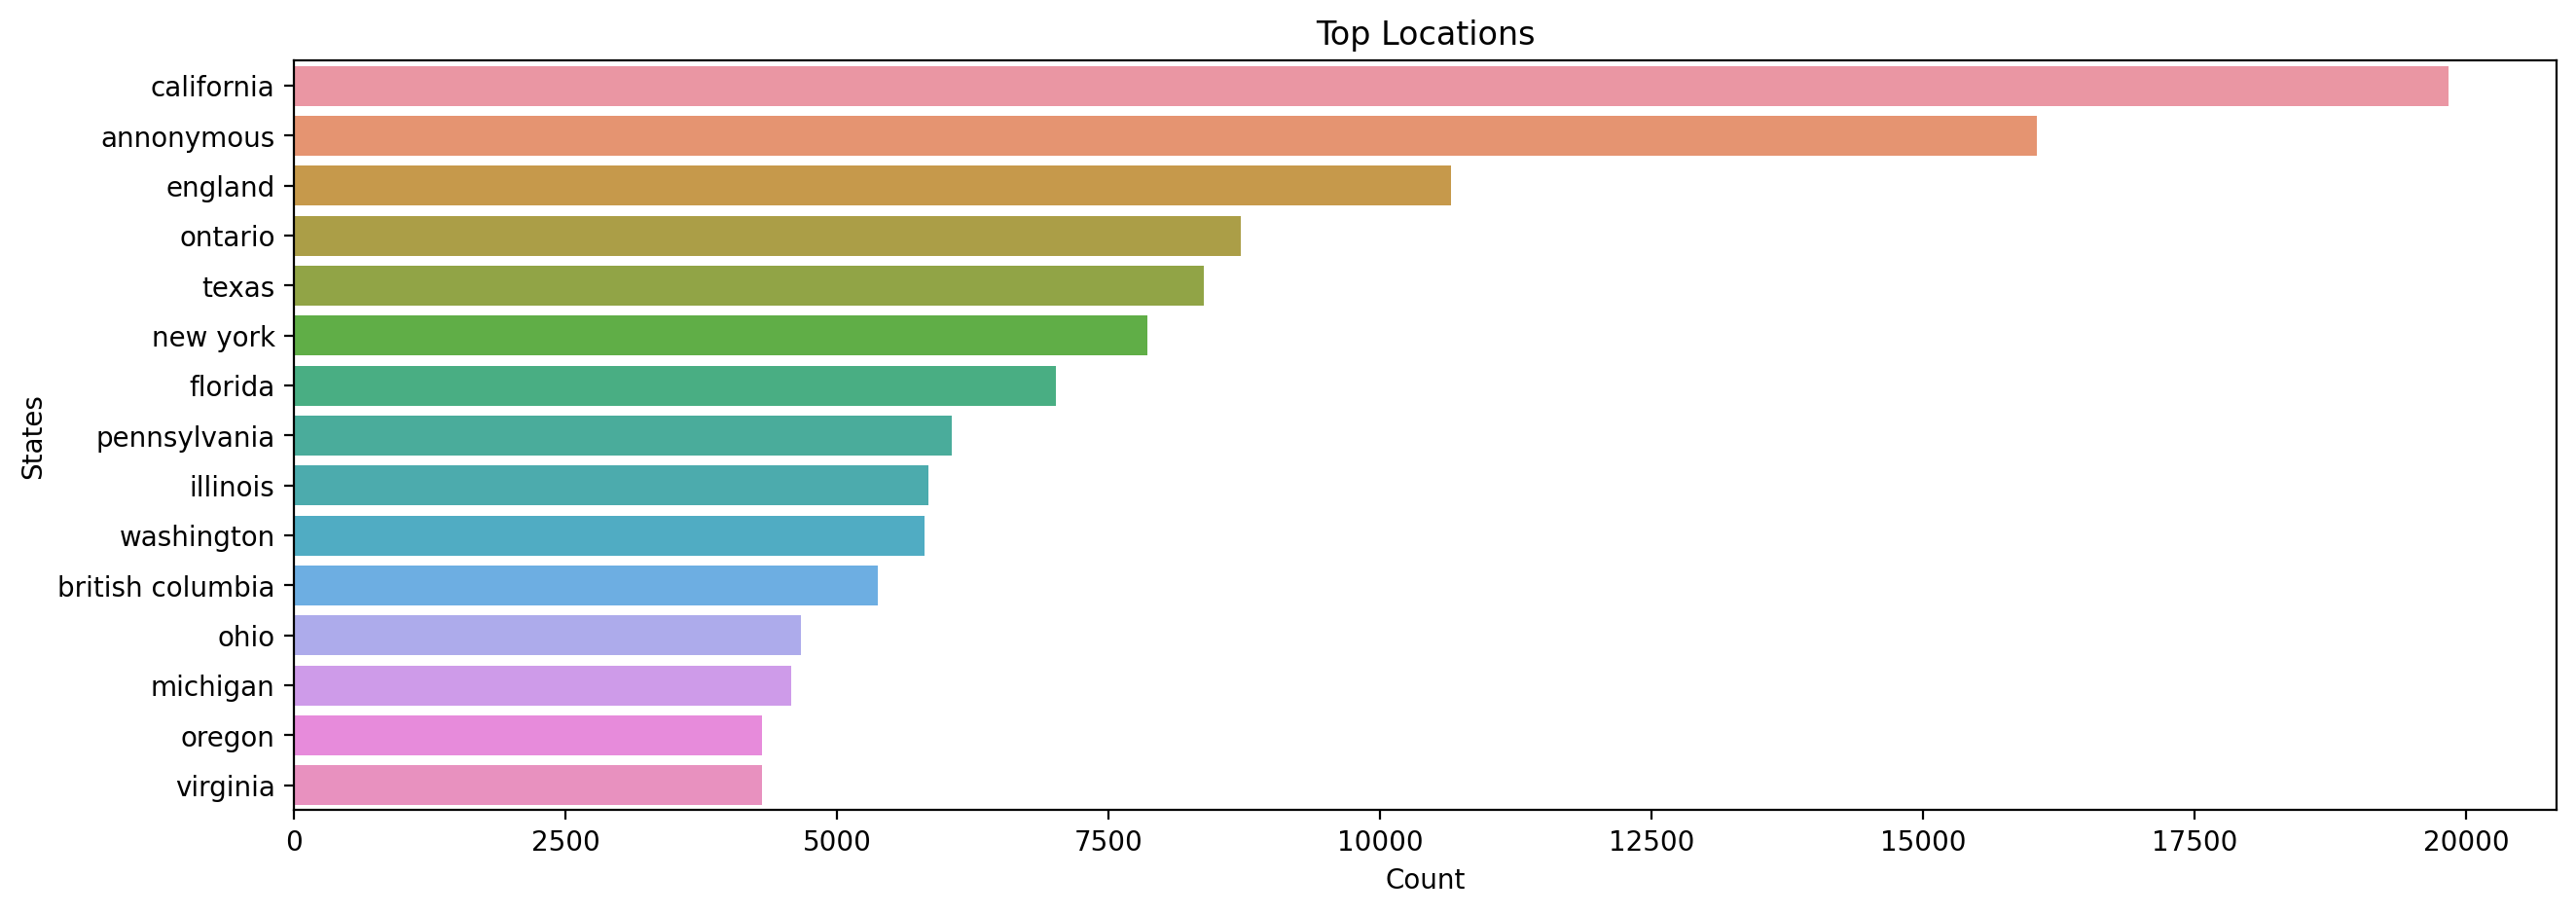

In [419]:
# Getting the top-15 countries with most user.
plt.figure(figsize= (15,5))

sns.barplot(y= users_df['State'].value_counts().iloc[:15].reset_index()['index'],
            x= users_df['State'].value_counts().iloc[:15].reset_index().State)
plt.title('Top Locations')
plt.ylabel('States')
plt.xlabel('Count')

### As we can see that, most of the users belongs to the State **California(Maximum)** followed by **England, Ontario, Texas, New York**.

### Top 15 Countries with most users:

Text(0.5, 0, 'Count')

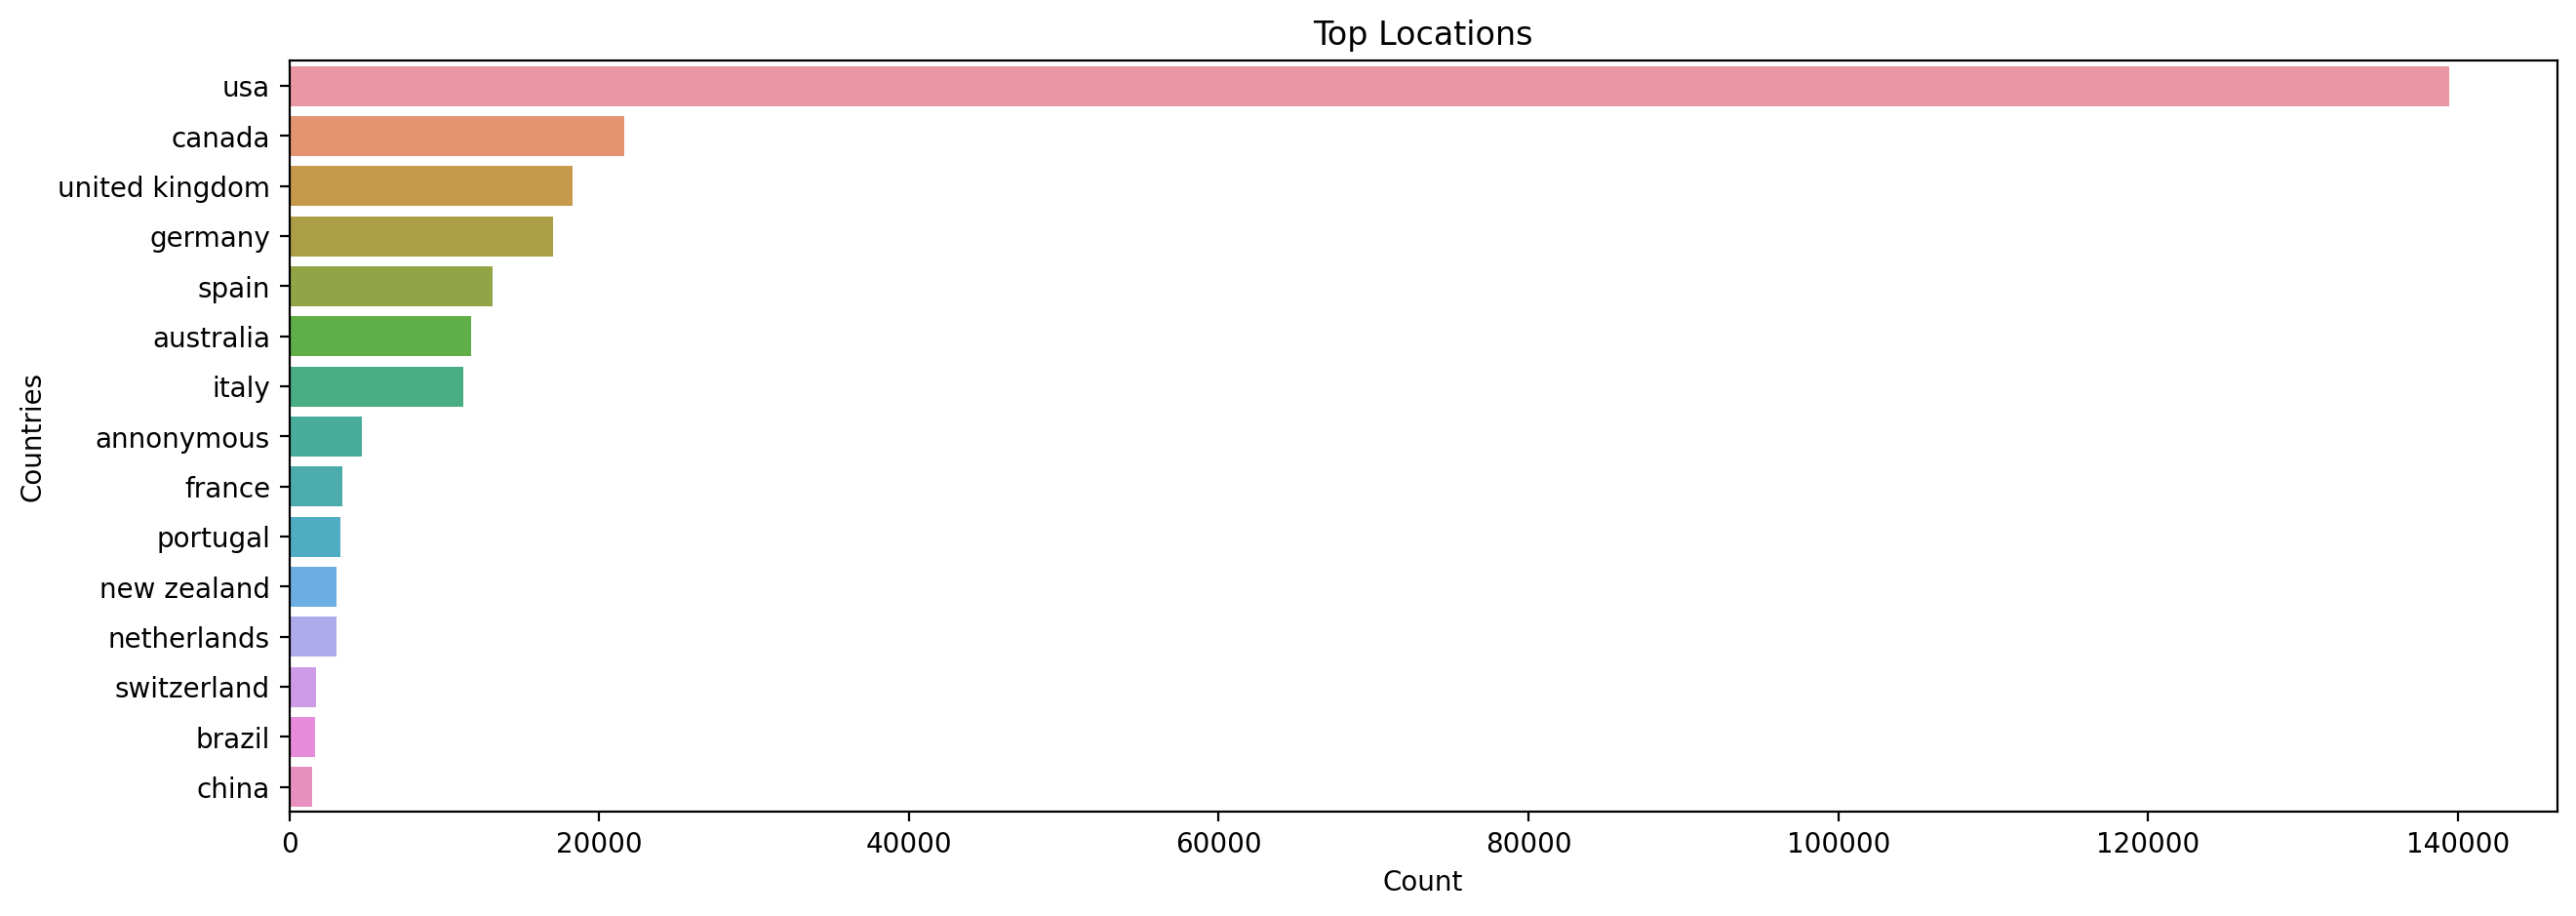

In [416]:
# Getting the top-15 countries with most user.
plt.figure(figsize= (15,5))

sns.barplot(y= users_df['Country'].value_counts().iloc[:15].reset_index()['index'],
            x= users_df['Country'].value_counts().iloc[:15].reset_index().Country)
plt.title('Top Locations')
plt.ylabel('Countries')
plt.xlabel('Count')

### As we can see that, most of the users belongs to the Country **USA(Maximum)** followed by **Canada, United Kingdom, Germany**.

## **Exploratory Data Analysis on ratings_df :**

---



In [ ]:
# first look of the dataset
ratings_df.head()

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
print('number of rows :', ratings_df.shape[0])
print('number of columns :', ratings_df.shape[1])

number of rows : 1149780
number of columns : 3


In [ ]:
# information of the rating dataset
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User_ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book_Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
# checking the description
ratings_df.describe(include= 'all')

,User_ID,ISBN,Book_Rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


In [ ]:
#checking for duplicates.
ratings_df.duplicated().sum()

0

In [ ]:
# Checking the null value in the ratings_df.
ratings_df.isna().sum()

User_ID        0
ISBN           0
Book_Rating    0
dtype: int64

In [ ]:
# Finding the unique value of Book_Rating.
sorted(ratings_df['Book_Rating'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## Remarks :

>### There are 3 Columns and 1149780 Rows in books_df.
>### Thers is No Duplicated records and Null values in any Column.
>### Ratings got values ranging between 0-10 where 0 is implicit.

### Merging the 3 Dataframes i.e **books_df, users_df and ratings_df** to form a single Dataframe :

In [ ]:
# First merging users_df and ratings_df
merged_df= pd.merge(users_df, ratings_df, on= 'User_ID')

# Merging books_df with merged_df
merged_df= merged_df.merge(books_df, on='ISBN')

In [ ]:
# Taking the copy of merged_df for safe operations.
df= merged_df.copy()

In [ ]:
# Name of the colums to rearrange.
cols = ['User_ID','Age', 'Location', 'Country', 'ISBN', 'Book_Title', 'Book_Author', 'Year_Of_Publication',
          'Publisher', 'Book_Rating', 'Image_URL_S', 'Image_URL_M', 'Image_URL_L']

In [ ]:
# Let's rearrange the columns properly by reindexing it.
df= df.reindex(columns= cols)

In [ ]:
# First look of df
df.head()

,User_ID,Age,Location,Country,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Book_Rating,Image_URL_S,Image_URL_M,Image_URL_L
0,2,18.0,"stockton, california, usa",usa,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,32.0,"timmins, ontario, canada",canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,5,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,49.0,"ottawa, ontario, canada",canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,32.0,"n/a, n/a, n/a",n/a,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,32.0,"sudbury, ontario, canada",canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [ ]:
# Checking the shape of dataframe.
df.shape

(1031134, 13)

In [ ]:
# Checking the columns.
df.columns

Index(['User_ID', 'Age', 'Location', 'Country', 'ISBN', 'Book_Title',
       'Book_Author', 'Year_Of_Publication', 'Publisher', 'Book_Rating',
       'Image_URL_S', 'Image_URL_M', 'Image_URL_L'],
      dtype='object')

In [ ]:
# Checking the info.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031134 entries, 0 to 1031133
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User_ID              1031134 non-null  int64  
 1   Age                  1031134 non-null  float64
 2   Location             1031134 non-null  object 
 3   Country              1031134 non-null  object 
 4   ISBN                 1031134 non-null  object 
 5   Book_Title           1031134 non-null  object 
 6   Book_Author          1031134 non-null  object 
 7   Year_Of_Publication  1031134 non-null  int64  
 8   Publisher            1031134 non-null  object 
 9   Book_Rating          1031134 non-null  int64  
 10  Image_URL_S          1031134 non-null  object 
 11  Image_URL_M          1031134 non-null  object 
 12  Image_URL_L          1031134 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 110.1+ MB


In [ ]:
# Checking the description.
df.describe()

,User_ID,Age,Year_Of_Publication,Book_Rating
count,1.031134e+06,1.031134e+06,1.031134e+06,1.031134e+06
mean,1.405945e+05,3.567386e+01,1.995295e+03,2.839045e+00
std,8.052472e+04,1.059143e+01,7.271437e+00,3.854157e+00
min,2.000000e+00,5.000000e+00,1.806000e+03,0.000000e+00
25%,7.041500e+04,3.100000e+01,1.992000e+03,0.000000e+00
50%,1.412100e+05,3.200000e+01,1.997000e+03,0.000000e+00
75%,2.114260e+05,4.100000e+01,2.001000e+03,7.000000e+00
max,2.788540e+05,1.000000e+02,2.021000e+03,1.000000e+01


In [ ]:
# Checking the Duplicates
df.duplicated().sum()

0

In [ ]:
# Checking the Null values.
df.isna().sum()

User_ID                0
Age                    0
Location               0
Country                0
ISBN                   0
Book_Title             0
Book_Author            0
Year_Of_Publication    0
Publisher              0
Book_Rating            0
Image_URL_S            0
Image_URL_M            0
Image_URL_L            0
dtype: int64

### As we can see that **df** has 1031134 rows and 13 columns without Duplicates and Null values.

## **Exploratory Data Analysis on df**

In [ ]:
df.head()

,User_ID,Age,Location,Country,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Book_Rating,Image_URL_S,Image_URL_M,Image_URL_L
0,2,18.0,"stockton, california, usa",usa,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,32.0,"timmins, ontario, canada",canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,5,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,49.0,"ottawa, ontario, canada",canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,32.0,"n/a, n/a, n/a",n/a,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,32.0,"sudbury, ontario, canada",canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [ ]:
# x[['City', 'State', 'Country']]=np.where((x.City=='' or ' ' or 'n/a') | (x.State=='' or ' ' or 'n/a') | (x.Country=='' or ' ' or 'n/a'),
#                                          'annonymous', x[['City', 'State', 'Country']])